# go/stop project 타짜인쥴

## 환경 설정ㅈ

In [1]:
!git clone https://github.com/fizyr/keras-retinanet.git

'keras-retinanet'에 복제합니다...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 6205 (delta 1), reused 3 (delta 1), pack-reused 6196
오브젝트를 받는 중: 100% (6205/6205), 13.48 MiB | 5.41 MiB/s, 완료.
델타를 알아내는 중: 100% (4196/4196), 완료.


In [2]:
!cd keras-retinanet && python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /home/aiffel0042/aiffel/AIFFEL_LSG/lms/03-GoingDeeper/03-Object_Detection/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/keras_retinanet
creating build/temp.linux-x86_64-3.7/keras_retinanet/utils
gcc -pthread -B /home/aiffel0042/anaconda3/envs/aiffel/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/aiffel0042/anaconda3/envs/aiffel/include/python3.7m -I/home/aiffel0042/anaconda3/envs/aiffel/l

In [3]:
!cd keras-retinanet && pip install -r requirements.txt

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-6t6e3rhz
     |████████████████████████████████| 320.4 MB 18 kB/s  eta 0:00:01     |████████████████                | 160.5 MB 2.9 MB/s eta 0:00:55


  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20487 sha256=1482899b5cd84166f47b42565310b19a1d71792b887d27fa00705ec008c87068
  Stored in directory: /home/aiffel0042/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=273826 sha256=45b5e67655b20c80a08acfca837342614c10817b2a686ad1a2702c311afb4808
  Stored in directory: /tmp/pip-ephem-wheel-cache-0sa33c2h/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built keras-resnet pycocotools
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [4]:
!cd keras-retinanet && pip install .

Processing /home/aiffel0042/aiffel/AIFFEL_LSG/lms/03-GoingDeeper/03-Object_Detection/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=171887 sha256=ce0cd490e6a3645f01dc52368d16a4e8de54b8b729aeb1fc3ced9e729c4defa0
  Stored in directory: /home/aiffel0042/.cache/pip/wheels/1d/13/fe/61187c37d9989928f56433219843d84cc1bf22c6d06af963f2
Successfully built keras-retinanet


## library import

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import tensorflow_datasets as tfds

import copy
import cv2
from PIL import Image, ImageDraw

## data set
- http://www.cvlibs.net/datasets/kitti/ 
- kiti dataset 

In [2]:
# 다운로드에 매우 긴 시간이 소요됩니다. 
import urllib3
urllib3.disable_warnings()
(ds_train, ds_test), ds_info = tfds.load(
    'kitti',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)

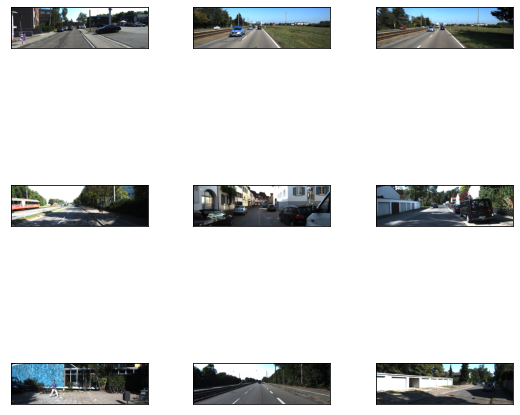

In [3]:
fig = tfds.show_examples(ds_train, ds_info)

In [4]:
ds_info

tfds.core.DatasetInfo(
    name='kitti',
    version=3.2.0,
    description='Kitti contains a suite of vision tasks built using an autonomous driving
platform. The full benchmark contains many tasks such as stereo, optical flow,
visual odometry, etc. This dataset contains the object detection dataset,
including the monocular images and bounding boxes. The dataset contains 7481
training images annotated with 3D bounding boxes. A full description of the
annotations can be found in the readme of the object development kit readme on
the Kitti homepage.',
    homepage='http://www.cvlibs.net/datasets/kitti/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/file_name': Text(shape=(), dtype=tf.string),
        'objects': Sequence({
            'alpha': tf.float32,
            'bbox': BBoxFeature(shape=(4,), dtype=tf.float32),
            'dimensions': Tensor(shape=(3,), dtype=tf.float32),
            'location': Tensor(shape=(3,), dtype

In [5]:
# data set 확인

In [5]:
TakeDataset = ds_train.take(1)

--Example--
['image', 'image/file_name', 'objects']
--objects--
{'alpha': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.51, -1.58, -1.06], dtype=float32)>, 'bbox': <tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.49181333, 0.4531723 , 0.53349334, 0.4672947 ],
       [0.4908    , 0.47625604, 0.57037336, 0.49844605],
       [0.21221334, 0.        , 0.80645335, 0.28123188]], dtype=float32)>, 'dimensions': <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 1.66,  1.73,  3.05],
       [ 2.85,  2.63, 12.34],
       [ 3.17,  2.76, 12.84]], dtype=float32)>, 'location': <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-4.19,  1.91, 79.12],
       [-0.55,  1.8 , 75.82],
       [-9.69,  1.82, 16.67]], dtype=float32)>, 'occluded': <tf.Tensor: shape=(3,), dtype=int64, numpy=array([0, 0, 1])>, 'rotation_y': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.57, -1.59, -1.58], dtype=float32)>, 'truncated': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.  , 0.

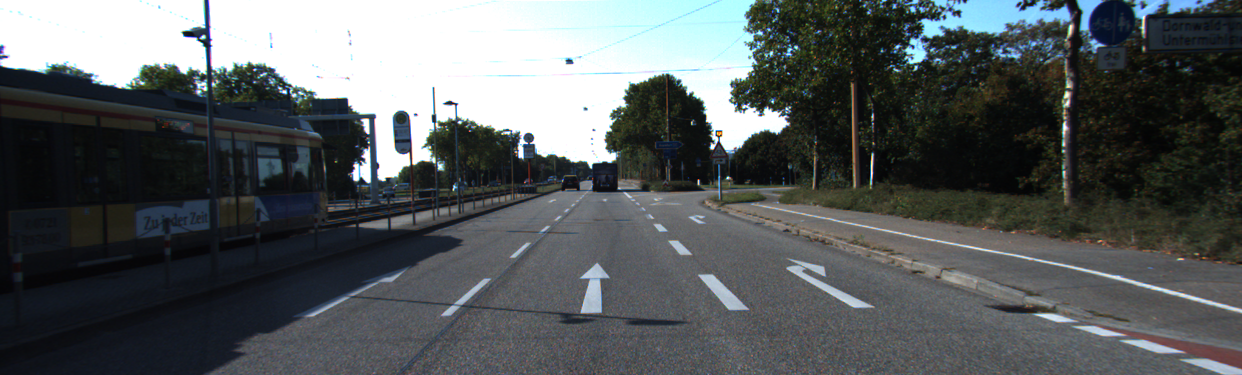

In [6]:
for example in TakeDataset:  
    print('--Example--')
    print(list(example.keys())) # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
    image = example["image"]
    filename = example["image/file_name"].numpy().decode('utf-8')
    objects = example["objects"]

print('--objects--')
print(objects)
img = Image.fromarray(image.numpy())
img

### KIIT 데이터 셋
데이터셋 이해를 위한 예시
Values    Name      Description
----------------------------------------------------------------------------
```
   1    type         Describes the type of object: 'Car', 'Van', 'Truck',
                     'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram',
                     'Misc' or 'DontCare'
   1    truncated    Float from 0 (non-truncated) to 1 (truncated), where
                     truncated refers to the object leaving image boundaries
   1    occluded     Integer (0,1,2,3) indicating occlusion state:
                     0 = fully visible, 1 = partly occluded
                     2 = largely occluded, 3 = unknown
   1    alpha        Observation angle of object, ranging [-pi..pi]
   4    bbox         2D bounding box of object in the image (0-based index):
                     contains left, top, right, bottom pixel coordinates
   3    dimensions   3D object dimensions: height, width, length (in meters)
   3    location     3D object location x,y,z in camera coordinates (in meters)
   1    rotation_y   Rotation ry around Y-axis in camera coordinates [-pi..pi]
   1    score        Only for results: Float, indicating confidence in
                     detection, needed for p/r curves, higher is better.
 ```

### 바운딩 박스 그려보기

1242 375
(3, 4)
[[562.83997 190.57    580.38    174.94   ]
 [591.51    190.95    619.07    161.10999]
 [  0.      295.41998 349.29     72.57999]]
---------
[562.83997 190.57    580.38    174.94   ]
[591.51    190.95    619.07    161.10999]
[  0.      295.41998 349.29     72.57999]
<PIL.Image.Image image mode=RGB size=1242x375 at 0x7FEEC023A3D0>


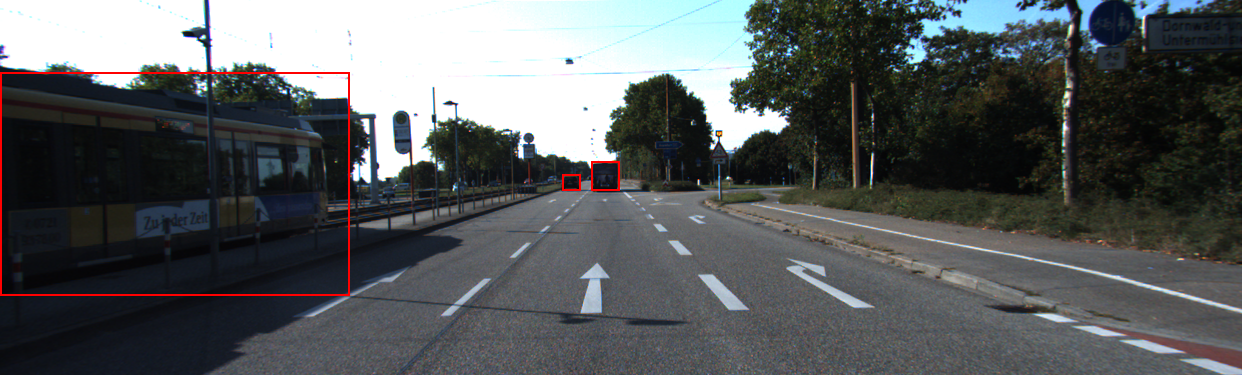

In [7]:
# 이미지 위에 바운딩 박스를 그려 화면에 표시해 주세요.
def visualize_bbox(input_image, object_bbox):
    input_image = copy.deepcopy(input_image)
    draw = ImageDraw.Draw(input_image)

    # 바운딩 박스 좌표(x_min, x_max, y_min, y_max) 구하기
    # [[YOUR CODE]]

    # 바운딩 박스 그리기
    # [[YOUR CODE]]
    
    
        # 바운딩 박스 좌표(x_min, x_max, y_min, y_max) 구하기
        # (0-based index): 변환 하는 듯.
    width, height = img.size # 원래 이미지
    print(width, height) # 원본이미지 가로 세로,
    print(object_bbox.shape) 
    x_min = object_bbox[:,1] * width
    x_max = object_bbox[:,3] * width
    y_min = height - object_bbox[:,0] * height
    y_max = height - object_bbox[:,2] * height

        # 바운딩 박스 그리기
    rects = np.stack([x_min, y_min, x_max, y_max], axis=1)
    print(rects)
    print("---------")
    for _rect in rects:
        print(_rect)
        draw.rectangle(_rect, outline=(255,0,0), width=2)
    print(input_image)
    return input_image

visualize_bbox(img, objects['bbox'].numpy())

## retinaNet

![](https://aiffelstaticprd.blob.core.windows.net/media/original_images/focal_loss.png)

- Focal loss
- moul
- 크로스 엔트로피 CE 앞단에 modulating factor

In [35]:
Image

<module 'PIL.Image' from '/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/PIL/Image.py'>

## data format 변경(csv, img 파일)

In [8]:
import os
from PIL import  Image

data_dir = os.getenv('HOME')+'/aiffel/AIFFEL_LSG/utill/kitti'
img_dir = os.getenv('HOME')+'/aiffel/AIFFEL_LSG/utill/kitti_images'
train_csv_path = data_dir + '/kitti_train.csv'

# parse_dataset 함수를 구현해 주세요.
def parse_dataset(dataset, img_dir="kitti_images", total=0):
    if not os.path.exists(img_dir):
        os.mkdir(img_dir)

    type_class_map = {
        0: "car",
        1: "car",
        2: "car",
        3: "person",
        4: "person",
        5: "person",
    }

    df = pd.DataFrame(columns=["img_path", "x1", "y1", "x2", "y2", "class_name"])
    for item in tqdm(dataset, total=total):
        # 코드 구현
        #print(dataset)
        # 이미지 저장 ##############################################################
        # 파일 이름 추출...
        file_name = item['image/file_name'].numpy().decode('utf-8')
        # 저장 경로 및 이름 지정.
        save_path = os.path.join(img_dir, file_name)
        # 이미지 데이터 추출..
        img = Image.fromarray(item["image"].numpy())
        # 이미지 저장
        img.save(save_path)
        
        #############################################################################
        
        
        # csv data 만들기 ############################################################
        object_bbox = item['objects']['bbox']
        object_type = item['objects']['type'].numpy()
        width, height = img.size
        
        # tf.dataset의 bbox좌표가 0과 1사이로 normalize된 좌표이므로 이를 pixel좌표로 변환합니다.
        x_min = object_bbox[:,1] * width
        x_max = object_bbox[:,3] * width
        y_min = height - object_bbox[:,2] * height
        y_max = height - object_bbox[:,0] * height

        # 한 이미지에 있는 여러 Object들을 한 줄씩 pandas.DataFrame에 append합니다.
        rects = np.stack([x_min, y_min, x_max, y_max], axis=1).astype(np.int)
        for i, _rect in enumerate(rects):
            _type = object_type[i]
            if _type not in type_class_map.keys():
                continue
            df = df.append({
                "img_path": save_path,
                "x1": _rect[0],
                "y1": _rect[1],
                "x2": _rect[2],
                "y2": _rect[3],
                "class_name": type_class_map[_type]
            }, ignore_index=True)
            break
        
        #############################################################################


    return df

df_train = parse_dataset(ds_train, img_dir, total=ds_info.splits['train'].num_examples)


 19%|█▊        | 1178/6347 [02:01<08:51,  9.72it/s]


KeyboardInterrupt: 

In [41]:
df_train.to_csv(train_csv_path, sep=',',index = False, header=False)

## 클래스 매핑 함수 정의

In [9]:
class_txt_path = data_dir + '/classes.txt'

def save_class_format(path="./classes.txt"):
    class_type_map = {
        "car" : 0,
        "person": 1
    }
    with open(path, mode='w', encoding='utf-8') as f:
        for k, v in class_type_map.items():
            f.write(f"{k},{v}\n")

save_class_format(class_txt_path)

In [10]:
## ㅏkeras Retinanet 리포지토리 사용. 

In [ ]:
# RetinaNet 훈련이 시작됩니다!! 50epoch 훈련에 1시간 이상 소요될 수 있습니다. 
#/AIFFEL_LSG/lms/03-GoingDeeper/03-Object_Detection/keras-retinanet
!python ~/aiffel/AIFFEL_LSG/lms/03-GoingDeeper/03-Object_Detection/keras-retinanet/keras_retinanet/bin/train.py --gpu 0 --multiprocessing --workers 4 --batch-size 2 --epochs 50 --steps 195 csv ~/aiffel/AIFFEL_LSG/utill/kitti/kitti_train.csv ~/aiffel/AIFFEL_LSG/utill/kitti/classes.txt

2020-11-03 17:51:02.978279: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-03 17:51:03.799953: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-03 17:51:03.833880: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-03 17:51:03.835480: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2070 computeCapability: 7.5
coreClock: 1.455GHz coreCount: 36 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 327.88GiB/s
2020-11-03 17:51:03.835557: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-03 17:51:03.839928: I tensorflow/stream_executor/platform

res5c_branch2c (Conv2D)         (None, None, None, 2 1048576     res5c_branch2b_relu[0][0]        
__________________________________________________________________________________________________
bn5c_branch2c (BatchNormalizati (None, None, None, 2 8192        res5c_branch2c[0][0]             
__________________________________________________________________________________________________
res5c (Add)                     (None, None, None, 2 0           bn5c_branch2c[0][0]              
                                                                 res5b_relu[0][0]                 
__________________________________________________________________________________________________
res5c_relu (Activation)         (None, None, None, 2 0           res5c[0][0]                      
__________________________________________________________________________________________________
C5_reduced (Conv2D)             (None, None, None, 2 524544      res5c_relu[0][0]                 
__________

195/195 [==============================] - ETA: 0s - loss: 2.7825 - regression_loss: 2.2314 - classification_loss: 0.5510
Epoch 00002: saving model to ./snapshots/resnet50_csv_02.h5
195/195 [==============================] - 63s 325ms/step - loss: 2.7825 - regression_loss: 2.2314 - classification_loss: 0.5510
Epoch 3/50
195/195 [==============================] - ETA: 0s - loss: 2.3393 - regression_loss: 1.8533 - classification_loss: 0.4860
Epoch 00003: saving model to ./snapshots/resnet50_csv_03.h5
195/195 [==============================] - 62s 316ms/step - loss: 2.3393 - regression_loss: 1.8533 - classification_loss: 0.4860
Epoch 4/50
195/195 [==============================] - ETA: 0s - loss: 2.1364 - regression_loss: 1.7023 - classification_loss: 0.4341
Epoch 00004: saving model to ./snapshots/resnet50_csv_04.h5
195/195 [==============================] - 63s 322ms/step - loss: 2.1364 - regression_loss: 1.7023 - classification_loss: 0.4341
Epoch 5/50
195/195 [=========================

195/195 [==============================] - ETA: 0s - loss: 1.4136 - regression_loss: 1.0857 - classification_loss: 0.3278
Epoch 00019: saving model to ./snapshots/resnet50_csv_19.h5
195/195 [==============================] - 68s 347ms/step - loss: 1.4136 - regression_loss: 1.0857 - classification_loss: 0.3278
Epoch 20/50
 73/195 [==========>...................] - ETA: 41s - loss: 1.2920 - regression_loss: 0.9787 - classification_loss: 0.3133

- 아래 코드를 사용해 학습된 모델을 추론을 위해 실행할 수 있는 케라스 모델로 변환합시다.

In [ ]:
!python ~/aiffel/AIFFEL_LSG/lms/03-GoingDeeper/03-Object_Detection/keras-retinanet/keras_retinanet/bin/convert_model.py ./snapshots/resnet50_csv_50.h5 ./snapshots/resnet50_csv_50_infer.h5

## test set download

mkdir -p ~/aiffel/object_detection/test_set   
wget https://aiffelstaticprd.blob.core.windows.net/media/documents/test_set.zip   
mv test_set.zip ~/aiffel/object_detection/test_set   
cd ~/aiffel/object_detection/test_set && unzip test_set.zip   

In [ ]:
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.models import load_model
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

gpu = '0'
setup_gpu(gpu)

model_path = os.path.join('.', 'snapshots', 'resnet50_csv_50_infer.h5')
model = load_model(model_path, backbone_name='resnet50')

In [ ]:
import os
img_path = './test_set/go_1.png'

# inference_on_image 함수를 구현해 주세요.
def inference_on_image(model, img_path="./test_set/go_0.png", visualize=True):
    image = read_image_bgr(img_path)

    # TODO: copy image to draw on

    # TODO: preprocess image for network

    # TODO: process image

    # TODO: correct for image scale

    # TODO: display images

inference_on_image(model, img_path=img_path)

In [ ]:

img_path = './test_set/go_1.png'

# inference_on_image 함수를 구현해 주세요.
def inference_on_image(model, img_path="./test_set/go_1.png", visualize=True):
    image = read_image_bgr(img_path)

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    color_map = {
        0: (0, 0, 255), # blue
        1: (255, 0, 0) # red
    }

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))

    # correct for image scale
    boxes /= scale

    # display images
    if  visualize:
        for box, score, label in zip(boxes[0], scores[0], labels[0]):
            print(box)
            if score < 0.5:
                break
            b = box.astype(int)
            draw_box(draw, b, color=color_map[label])

            caption = "{:.3f}".format(score)
            draw_caption(draw, b, caption)

        plt.figure(figsize=(15, 15))
        plt.axis('off')
        plt.imshow(draw)
        plt.show()            

inference_on_image(model, img_path=img_path)

In [ ]:
img_path = os.getenv('HOME')+'/aiffel/object_detection/test_set/stop_1.png'
inference_on_image(model, img_path=img_path)

# 자율 주행 보조 시스템 만들기

- 입력으로 이미지 경로를 받습니다.
- 정지조건에 맞는 경우 "Stop" 아닌 경우 "Go"를 반환합니다.
- 조건은 다음과 같습니다.
    - 사람이 한 명 이상 있는 경우
    - 차량의 크기(width or height)가 300px이상인 경우

In [ ]:
img_path = os.getenv('HOME')+'/aiffel/object_detection/test_set/stop_1.png'

def self_drive_assist(img_path, size_limit=300):
    # 코드 구현
        # 정지조건에 맞으면 return "Stop"
        # 아닌 경우 return "Go"

print(self_drive_assist(img_path))    

In [ ]:
## 시스템 평가하기

In [ ]:
import os

def test_system(func):
    work_dir = os.getenv('HOME')+'/aiffel/object_detection'
    score = 0
    test_set=[
        ("test_set/stop_1.png", "Stop"),
        ("test_set/stop_2.png", "Stop"),
        ("test_set/stop_3.png", "Stop"),
        ("test_set/stop_4.png", "Stop"),
        ("test_set/stop_5.png", "Stop"),
        ("test_set/go_1.png", "Go"),
        ("test_set/go_2.png", "Go"),
        ("test_set/go_3.png", "Go"),
        ("test_set/go_4.png", "Go"),
        ("test_set/go_5.png", "Go"),
    ]

    for image_file, answer in test_set:
        image_path = work_dir + '/' + image_file
        pred = func(image_path)
        if pred == answer:
            score += 10
    print(f"{score}점입니다.")

test_system(self_drive_assist)